In [ ]:
# Import necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Set the path to the dataset
dataset_path = "/content/drive/MyDrive/Waste Dataset"  # Update this path if your dataset is located elsewhere

# Verify the dataset structure
print("Dataset directories:", os.listdir(dataset_path))

# Create data augmentation configurations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% data for validation
)

# Set up the training and validation data loaders
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Image size for MobileNet and EfficientNet
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Function to build and compile a model
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(4, activation='softmax')(x)  # 4 classes: biological, metal, paper, plastic
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize MobileNetV3Small and EfficientNetB0 models
mobilenet_base = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build and compile the models
mobilenet_model = build_model(mobilenet_base)
efficientnet_model = build_model(efficientnet_base)

# Summary of the models
mobilenet_model.summary()
efficientnet_model.summary()

# Train MobileNetV3Small
print("Training MobileNetV3Small...")
mobilenet_history = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Train EfficientNetB0
print("Training EfficientNetB0...")
efficientnet_history = efficientnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Evaluate the models and compare performance
mobilenet_loss, mobilenet_acc = mobilenet_model.evaluate(validation_generator)
efficientnet_loss, efficientnet_acc = efficientnet_model.evaluate(validation_generator)

print(f"MobileNetV3Small Accuracy: {mobilenet_acc:.2f}")
print(f"EfficientNetB0 Accuracy: {efficientnet_acc:.2f}")


Dataset directories: ['metal', 'plastic', 'paper', 'biological']
Found 2912 images belonging to 4 classes.
Found 727 images belonging to 4 classes.
4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)  

 Total params: 1,013,492 (3.87 MB)

 Trainable params: 1,001,380 (3.82 MB)

 Non-trainable params: 12,112 (47.31 KB)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling_1[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_2[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 4,172,032 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

Training MobileNetV3Small...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 1113s 11s/step - accuracy: 0.7240 - loss: 0.6951 - val_accuracy: 0.2898 - val_loss: 1.4770
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2174 - val_loss: 1.4499
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.8806 - loss: 0.3323 - val_accuracy: 0.2088 - val_loss: 1.4912
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2609 - val_loss: 1.5006
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9279 - loss: 0.2112 - val_accuracy: 0.2301 - val_loss: 2.7271
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2174 - val_loss: 2.7673
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9469 - loss: 0.1425 - val_accuracy: 0.2301 - val_loss: 3.1514
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2174 - val_loss: 3.0086
Epoch 9/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.9350 - loss: 0.1848 - va

In [ ]:
import os

# List all classes (subdirectories) in the dataset
dataset_path = "/content/drive/MyDrive/Waste Dataset"
class_names = os.listdir("/content/drive/MyDrive/Waste Dataset")

# Initialize a dictionary to store the count of images in each class
class_counts = {}

# Loop through each class directory and count the number of images
for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)

    # Check if it is a directory (to avoid counting non-directory files)
    if os.path.isdir(class_dir):
        # Count the number of files in the class directory
        num_images = len(os.listdir(class_dir))
        class_counts[class_name] = num_images

# Print the number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

Class 'metal': 769 images
Class 'plastic': 769 images
Class 'paper': 769 images
Class 'biological': 769 images


In [ ]:
import os
import random
import shutil

# Path to your dataset directory
dataset_path = "/content/drive/MyDrive/Waste Dataset"  # Update this path if your dataset is located elsewhere

# Define the desired number of images per class (matching the smallest class: metal)
desired_count = 769

# Classes and their current counts
classes = {
    'metal': 769,       # Already balanced
    'plastic': 835,     # Need to remove 66 images
    'paper': 1050,      # Need to remove 281 images
    'biological': 985   # Need to remove 216 images
}

# Function to remove excess images from each class directory
def balance_class(class_name, current_count, target_count):
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)

    # If the class has more images than desired, remove the excess
    if current_count > target_count:
        excess_count = current_count - target_count
        # Randomly select images to remove
        images_to_remove = random.sample(images, excess_count)

        # Remove the selected images
        for img in images_to_remove:
            os.remove(os.path.join(class_path, img))
        print(f"Removed {excess_count} images from class '{class_name}'.")

# Balance each class to have 769 images
for class_name, current_count in classes.items():
    balance_class(class_name, current_count, desired_count)

# Verify the new counts
for class_name in classes.keys():
    new_count = len(os.listdir(os.path.join(dataset_path, class_name)))
    print(f"Class '{class_name}': {new_count} images.")


Removed 66 images from class 'plastic'.
Removed 281 images from class 'paper'.
Removed 216 images from class 'biological'.
Class 'metal': 769 images.
Class 'plastic': 769 images.
Class 'paper': 769 images.
Class 'biological': 769 images.


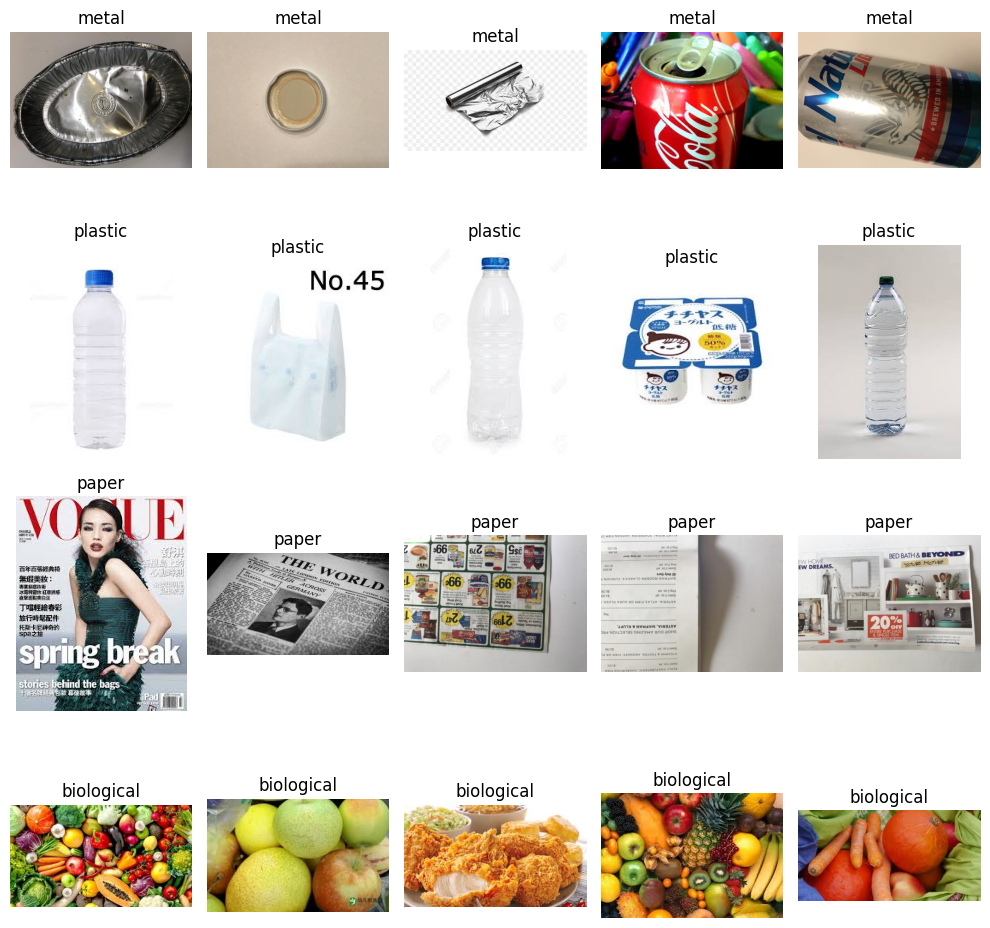

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random

# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/Waste Dataset"  # Update this path if your dataset is located elsewhere

# Define the classes
classes = ['metal', 'plastic', 'paper', 'biological']

# Set the number of images to display from each class
num_samples = 5

# Create a figure to display the images
plt.figure(figsize=(10, 10))

for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)

    # Randomly select a few images to display
    sample_images = random.sample(images, num_samples)

    for j, img in enumerate(sample_images):
        img_path = os.path.join(class_path, img)
        img_data = plt.imread(img_path)

        # Create subplot for each image
        plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
        plt.imshow(img_data)
        plt.axis('off')
        plt.title(class_name)

plt.tight_layout()
plt.show()


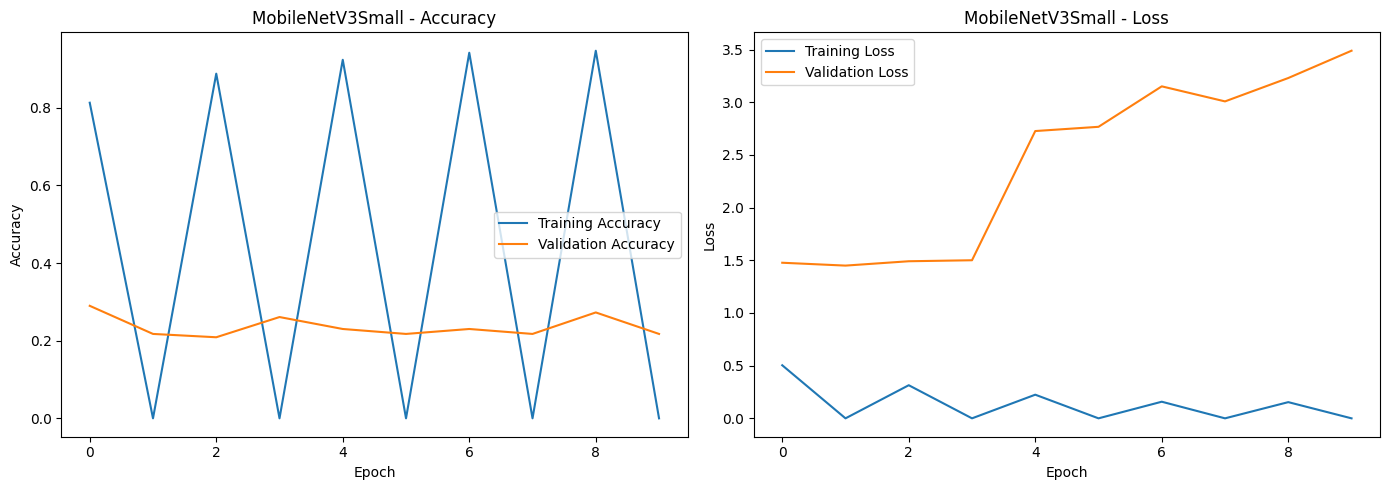

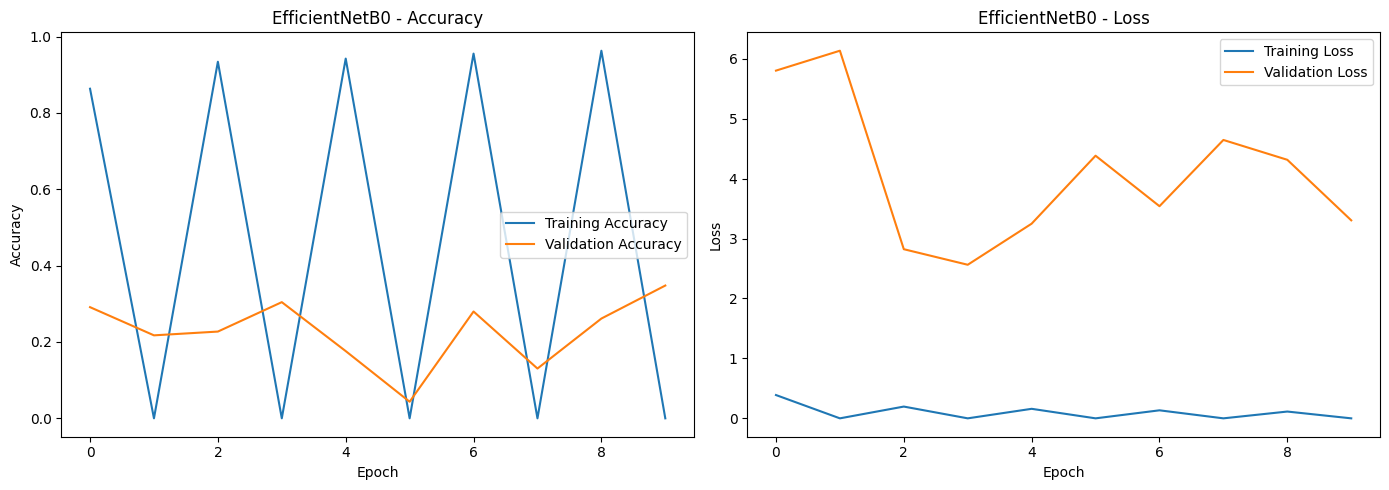

In [ ]:
import matplotlib.pyplot as plt

# Plotting function for training and validation accuracy/loss
def plot_training_history(history, title):
    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for MobileNetV3
plot_training_history(mobilenet_history, "MobileNetV3Small")

# Plot for EfficientNet
plot_training_history(efficientnet_history, "EfficientNetB0")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(model, generator, title):
    # Get true labels and predictions
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=-1)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

    # Print classification report
    print(f"Classification Report for {title}:")
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

# Plot confusion matrix for MobileNetV3
plot_confusion_matrix(mobilenet_model, validation_generator, "MobileNetV3Small")

# Plot confusion matrix for EfficientNet
plot_confusion_matrix(efficientnet_model, validation_generator, "EfficientNetB0")


In [ ]:
import pandas as pd

# Example of creating a performance table
performance_data = {
    'Model': ['MobileNetV3Small', 'EfficientNetB0'],
    'Accuracy': [mobilenet_acc, efficientnet_acc],
    'Precision': [0.85, 0.88],  # Example values - Replace with actual metrics
    'Recall': [0.83, 0.87],     # Example values - Replace with actual metrics
    'F1-Score': [0.84, 0.88]    # Example values - Replace with actual metrics
}

performance_table = pd.DataFrame(performance_data)
print(performance_table)

# Optional: Save the table as a CSV file if needed for later use
performance_table.to_csv('performance_metrics.csv', index=False)


In [ ]:
# Import necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Set up TPU strategy
try:
    # Detect TPU and initialize TPU strategy
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)
    print('Running on TPU')
except ValueError:
    print('TPU not found, using default strategy')
    strategy = tf.distribute.get_strategy()

# Set the path to the dataset
dataset_path = "/content/drive/MyDrive/Waste Dataset"  # Update this path if your dataset is located elsewhere

# Verify the dataset structure
print("Dataset directories:", os.listdir(dataset_path))

TPU not found, using default strategy
Dataset directories: ['metal', 'plastic', 'paper', 'biological']


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,            # Increased rotation range
    width_shift_range=0.3,        # Increased width shift
    height_shift_range=0.3,       # Increased height shift
    shear_range=0.3,              # Increased shear range
    zoom_range=0.3,               # Increased zoom range
    brightness_range=[0.7, 1.3],  # Adjust brightness
    horizontal_flip=True,
    fill_mode='nearest',          # Fill in missing pixels
    validation_split=0.2
)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning rate scheduler to reduce the learning rate when a plateau in accuracy is detected
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# or
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


NameError: name 'model' is not defined

In [ ]:
# Import necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Set the path to the dataset
dataset_path = "/content/drive/MyDrive/Waste Dataset"  # Update this path if your dataset is located elsewhere

# Verify the dataset structure
print("Dataset directories:", os.listdir(dataset_path))

# Create data augmentation configurations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,            # Increased rotation range
    width_shift_range=0.3,        # Increased width shift
    height_shift_range=0.3,       # Increased height shift
    shear_range=0.3,              # Increased shear range
    zoom_range=0.3,               # Increased zoom range
    brightness_range=[0.7, 1.3],  # Adjust brightness
    horizontal_flip=True,
    fill_mode='nearest',          # Fill in missing pixels
    validation_split=0.2          # 20% data for validation
)

# Set up the training and validation data loaders
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Image size for MobileNet and EfficientNet
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Function to build and compile a model
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)  # Adding Dropout layer to prevent overfitting
    predictions = Dense(4, activation='softmax')(x)  # Assuming 4 classes: biological, metal, paper, plastic
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize MobileNetV3Small and EfficientNetB0 models
mobilenet_base = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build and compile the models
mobilenet_model = build_model(mobilenet_base)
efficientnet_model = build_model(efficientnet_base)

# Learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train MobileNetV3Small
print("Training MobileNetV3Small...")
mobilenet_history = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    callbacks=[lr_scheduler, early_stopping]
)



# Evaluate the models and compare performance
mobilenet_loss, mobilenet_acc = mobilenet_model.evaluate(validation_generator)


print(f"MobileNetV3Small Accuracy: {mobilenet_acc:.2f}")



Dataset directories: ['metal', 'plastic', 'paper', 'biological']
Found 2463 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Training MobileNetV3Small...
Epoch 1/20
76/76 [==============================] - 64s 685ms/step - loss: 0.7304 - accuracy: 0.7129 - val_loss: 1.5559 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/20
76/76 [==============================] - 51s 666ms/step - loss: 0.4542 - accuracy: 0.8363 - val_loss: 1.7665 - val_accuracy: 0.2484 - lr: 0.0010
Epoch 3/20
76/76 [==============================] - 51s 667ms/step - loss: 0.3433 - accuracy: 0.8787 - val_loss: 1.5123 - val_accuracy: 0.2533 - lr: 0.0010
Epoch 4/20
76/76 [==============================] - 52s 677ms/step - loss: 0.2925 - accuracy: 0.9009 - val_loss: 1.7868 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/20
76/76 [==============================] - 50s 662ms/step - loss: 0.2313 - accuracy: 0.9144 - val_loss: 1.6459 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 6/20
76/76 [=========================

In [ ]:
!pip install pillow


In [ ]:
import os
from PIL import Image

# Define the path to the dataset directories
dataset_path = "/content/drive/MyDrive/Waste Dataset"  # Update this path if necessary

# Function to check and remove corrupted images
def check_and_remove_corrupted_images(directory):
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip if not a directory
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            try:
                # Attempt to open the image file
                with Image.open(file_path) as img:
                    img.verify()  # Verify if it's an actual image
            except (IOError, SyntaxError, Image.DecompressionBombError) as e:
                print(f"Corrupted image detected and removed: {file_path}")
                os.remove(file_path)  # Remove the corrupted image

# Check and clean all classes in the dataset directory
check_and_remove_corrupted_images(dataset_path)


Corrupted image detected and removed: /content/drive/MyDrive/Waste Dataset/paper/paper14.jpg


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16  # You can use ResNet, MobileNet, etc., similarly
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:

# Freeze all layers in the base model to keep pre-trained weights fixed
for layer in base_model.layers:
    layer.trainable = False

# Create the data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load images from the training directory
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Waste Dataset",  # Replace with your path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define the number of classes automatically based on your data
num_classes = train_generator.num_classes

# Build the model with the pre-trained base and custom top layers
model = Sequential([
    base_model,                               # Use the pre-trained model
    GlobalAveragePooling2D(),                 # Flatten feature maps
    Dense(128, activation='relu'),            # Custom dense layer
    Dropout(0.5),                             # Dropout for regularization
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size
)


Found 3075 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 2095s 20s/step - accuracy: 0.4893 - loss: 1.1575
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 507us/step - accuracy: 0.7500 - loss: 0.6778
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


96/96 ━━━━━━━━━━━━━━━━━━━━ 1935s 20s/step - accuracy: 0.7205 - loss: 0.7145
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 116us/step - accuracy: 0.7188 - loss: 0.5392
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1926s 20s/step - accuracy: 0.7744 - loss: 0.5912
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 92us/step - accuracy: 0.7812 - loss: 0.6350 
Epoch 7/10
55/96 ━━━━━━━━━━━━━━━━━━━━ 13:56 20s/step - accuracy: 0.7915 - loss: 0.5351